<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html week1.do.txt --no_mako -->
<!-- dom:TITLE: First week: Quantum Computing, Quantum Machine Learning and Quantum Information Theories -->

# First week: Quantum Computing, Quantum Machine Learning and Quantum Information Theories
**Morten Hjorth-Jensen**, Department of Physics and Center for Computing in Science Education, University of Oslo, Norway and Department of Physics and Astronomy and Facility for Rare Isotope Beams, Michigan State University, East Lansing, Michigan, USA

Date: **Jan 8, 2023**

Copyright 1999-2023, Morten Hjorth-Jensen. Released under CC Attribution-NonCommercial 4.0 license

## Overview of week first week, Getting started and Mathematics Reminder

**Basics in Linear Algebra, The Hilbert Space, Operators on Hilbert Spaces, Composite Systems.**

1. Description of Quantum Systems 

2. States in Hilbert Space 

3. Quantum Channels

4. Measurements

## Linear Algebra and quantum mechanical states

There are several central software packages for linear algebra and
eigenvalue problems. Several of the more popular ones have been
wrapped into ofter software packages like those from the widely used
text **Numerical Recipes**. The original source codes in many of the
available packages are often taken from the widely used software
package LAPACK, which follows two other popular packages developed in
the 1970s, namely EISPACK and LINPACK.  We describe them shortly here.

  * LINPACK: package for linear equations and least square problems.

  * LAPACK:package for solving symmetric, unsymmetric and generalized eigenvalue problems. From LAPACK's website <http://www.netlib.org> it is possible to download for free all source codes from this library. Both C/C++ and Fortran versions are available.

  * BLAS (I, II and III): (Basic Linear Algebra Subprograms) are routines that provide standard building blocks for performing basic vector and matrix operations. Blas I is vector operations, II vector-matrix operations and III matrix-matrix operations. Highly parallelized and efficient codes, all available for download from <http://www.netlib.org>.

When dealing with matrices and vectors a central issue is memory
handling and allocation. If our code is written in Python the way we
declare these objects and the way they are handled, interpreted and
used by say a linear algebra library, requires codes that interface
our Python program with such libraries. For Python programmers,
**Numpy** is by now the standard Python package for numerical arrays in
Python as well as the source of functions which act on these
arrays. These functions span from eigenvalue solvers to functions that
compute the mean value, variance or the covariance matrix. If you are
not familiar with how arrays are handled in say Python or compiled
languages like C++ and Fortran, the sections in this chapter may be
useful. For C++ programmer, **Armadillo** is widely used library for
linear algebra and eigenvalue problems. In addition it offers a
convenient way to handle and organize arrays. We discuss this library
as well.   Before we proceed we believe  it may be convenient to repeat some basic features of 
 matrices and vectors.

$$
\mathbf{A} =
      \begin{bmatrix} a_{11} & a_{12} & a_{13} & a_{14} \\
                                 a_{21} & a_{22} & a_{23} & a_{24} \\
                                   a_{31} & a_{32} & a_{33} & a_{34} \\
                                  a_{41} & a_{42} & a_{43} & a_{44}
             \end{bmatrix}\qquad
\mathbf{I} =
      \begin{bmatrix} 1 & 0 & 0 & 0 \\
                                 0 & 1 & 0 & 0 \\
                                 0 & 0 & 1 & 0 \\
                                 0 & 0 & 0 & 1
             \end{bmatrix}
$$

The inverse of a matrix is defined by

$$
\mathbf{A}^{-1} \cdot \mathbf{A} = I
$$

$A = A^{T}$          symmetric        $a_{ij} = a_{ji}$           
 $A = \left (A^{T} \right )^{-1}$  real orthogonal  $\sum_k a_{ik} a_{jk} = \sum_k a_{ki} a_{kj} = \delta_{ij}$ 
 $A = A^{ * }$           real matrix      $a_{ij} = a_{ij}^{ * }$      
 $A = A^{\dagger}$       hermitian      $a_{ij} = a_{ji}^{ * }$       
 $A = \left (A^{\dagger} \right )^{-1}$  unitary | $\sum_k a_{ik} a_{jk}^{ * } = \sum_k a_{ki}^{ * } a_{kj} = \delta_{ij}$ 

  * Diagonal if $a_{ij}=0$ for $i\ne j$

  * Upper triangular if $a_{ij}=0$ for $i > j$

  * Lower triangular if $a_{ij}=0$ for $i < j$

  * Upper Hessenberg if $a_{ij}=0$ for $i > j+1$

  * Lower Hessenberg if $a_{ij}=0$ for $i < j+1$

  * Tridiagonal if $a_{ij}=0$ for $|i -j| > 1$

  * Lower banded with bandwidth $p$: $a_{ij}=0$ for $i > j+p$

  * Upper banded with bandwidth $p$: $a_{ij}=0$ for $i < j+p$

  * Banded, block upper triangular, block lower triangular....

Some Equivalent Statements. For an $N\times N$ matrix  $\mathbf{A}$ the following properties are all equivalent

  * If the inverse of $\mathbf{A}$ exists, $\mathbf{A}$ is nonsingular.

  * The equation $\mathbf{Ax}=0$ implies $\mathbf{x}=0$.

  * The rows of $\mathbf{A}$ form a basis of $R^N$.

  * The columns of $\mathbf{A}$ form a basis of $R^N$.

  * $\mathbf{A}$ is a product of elementary matrices.

  * $0$ is not eigenvalue of $\mathbf{A}$.

## Numpy and arrays
[Numpy](http://www.numpy.org/) provides an easy way to handle arrays in Python. The standard way to import this library is as

In [1]:
import numpy as np
n = 10
x = np.random.normal(size=n)
print(x)

Here we have defined a vector $x$ with $n=10$ elements with its values given by the Normal distribution $N(0,1)$.
Another alternative is to declare a vector as follows

In [2]:
import numpy as np
x = np.array([1, 2, 3])
print(x)

Here we have defined a vector with three elements, with $x_0=1$, $x_1=2$ and $x_2=3$. Note that both Python and C++
start numbering array elements from $0$ and on. This means that a vector with $n$ elements has a sequence of entities $x_0, x_1, x_2, \dots, x_{n-1}$. We could also let (recommended) Numpy to compute the logarithms of a specific array as

In [3]:
import numpy as np
x = np.log(np.array([4, 7, 8]))
print(x)

Here we have used Numpy's unary function $np.log$. This function is
highly tuned to compute array elements since the code is vectorized
and does not require looping. We normaly recommend that you use the
Numpy intrinsic functions instead of the corresponding **log** function
from Python's **math** module. The looping is done explicitely by the
**np.log** function. The alternative, and slower way to compute the
logarithms of a vector would be to write

In [4]:
import numpy as np
from math import log
x = np.array([4, 7, 8])
for i in range(0, len(x)):
    x[i] = log(x[i])
print(x)

We note that our code is much longer already and we need to import the **log** function from the **math** module. 
The attentive reader will also notice that the output is $[1, 1, 2]$. Python interprets automacally our numbers as integers (like the **automatic** keyword in C++). To change this we could define our array elements to be double precision numbers as

In [5]:
import numpy as np
x = np.log(np.array([4, 7, 8], dtype = np.float64))
print(x)

or simply write them as double precision numbers (Python uses 64 bits as default for floating point type variables), that is

In [6]:
import numpy as np
x = np.log(np.array([4.0, 7.0, 8.0])
print(x)

To check the number of bytes (remember that one byte contains eight bits for double precision variables), you can use simple use the **itemsize** functionality (the array $x$ is actually an object which inherits the functionalities defined in Numpy) as

In [7]:
import numpy as np
x = np.log(np.array([4.0, 7.0, 8.0])
print(x.itemsize)

Having defined vectors, we are now ready to try out matrices. We can define a $3 \times 3 $ real matrix $\hat{A}$
as (recall that we user lowercase letters for vectors and uppercase letters for matrices)

In [8]:
import numpy as np
A = np.log(np.array([ [4.0, 7.0, 8.0], [3.0, 10.0, 11.0], [4.0, 5.0, 7.0] ]))
print(A)

If we use the **shape** function we would get $(3, 3)$ as output, that is verifying that our matrix is a $3\times 3$ matrix. We can slice the matrix and print for example the first column (Python organized matrix elements in a row-major order, see below) as

In [9]:
import numpy as np
A = np.log(np.array([ [4.0, 7.0, 8.0], [3.0, 10.0, 11.0], [4.0, 5.0, 7.0] ]))
# print the first column, row-major order and elements start with 0
print(A[:,0])

We can continue this was by printing out other columns or rows. The example here prints out the second column

In [10]:
import numpy as np
A = np.log(np.array([ [4.0, 7.0, 8.0], [3.0, 10.0, 11.0], [4.0, 5.0, 7.0] ]))
# print the first column, row-major order and elements start with 0
print(A[1,:])

Numpy contains many other functionalities that allow us to slice, subdivide etc etc arrays. We strongly recommend that you look up the [Numpy website for more details](http://www.numpy.org/). Useful functions when defining a matrix are the **np.zeros** function which declares a matrix of a given dimension and sets all elements to zero

In [11]:
import numpy as np
n = 10
# define a matrix of dimension 10 x 10 and set all elements to zero
A = np.zeros( (n, n) )
print(A)

or initializing all elements to

In [12]:
import numpy as np
n = 10
# define a matrix of dimension 10 x 10 and set all elements to one
A = np.ones( (n, n) )
print(A)

or as unitarily distributed random numbers (see the material on random number generators in the statistics part)

In [13]:
import numpy as np
n = 10
# define a matrix of dimension 10 x 10 and set all elements to random numbers with x \in [0, 1]
A = np.random.rand(n, n)
print(A)

## Defining basis states and quantum mechanical operators

We start by defining a state vector $\boldsymbol{x}$ (meant to represent
various quantum mechanical degrees of freedom) with $n$ components as

$$
\boldsymbol{x} = \begin{bmatrix} x_0\\ x_1 \\ x_2 \\ \dots \\ \dots \\ x_{n-1} \end{bmatrix}.
$$

Throughout these notes we will use the so-called Dirac **\bra-ket**
formalism and we will replace the above standard boldfaced notation
for a vector with

$$
\boldsymbol{x} = \vert x \rangle = \begin{bmatrix} x_0\\ x_1 \\ x_2 \\ \dots \\ \dots \\ x_{n-1} \end{bmatrix},
$$

and

$$
\boldsymbol{x}^{\dagger} = \langle x \vert = \begin{bmatrix} x_0^* & x_1^* & x_2^* & \dots & \dots & x_{n-1}^* \end{bmatrix},
$$

With a given vector $\vert x \rangle$, we define the inner product as

$$
\langle x \vert x\rangle = \sum_{i=0}^{n-1} x_i^*x_i=x_0^2+x_1^2+\dots + x_{n-1}^2.
$$

For two arbitrary vectors $\vert x\rangle$ and $\vert y\rangle$ with the same lentgh, we have the
general expression

$$
\langle y \vert x\rangle = \sum_{i=0}^{n-1} y_i^*x_i=y_0^*x_0+y_1^*x_1+\dots + y_{n-1}^*x_{n-1}.
$$

Note well that the inner product $\langle x \vert x\rangle$ is always a real number while for a two different vectors $\langle y \vert x\rangle$ is in general not equal to
$\langle x \vert y\rangle$, as can be seen from the following example

We note in bypassing that $\vert x\rangle^{\dagger}=\langle x \vert$,
$\langle x\vert^{\dagger}=\vert x\rangle$ and $(\vert
x\rangle^{\dagger})^{\dagger}=\vert x \rangle$.

### Examples

Let us assume that $\vert x \rangle$ is given by

$$
\vert x \rangle = \begin{bmatrix} 1-\imath \\ 2+\imath \end{bmatrix}.
$$

The inner product gives us

$$
\langle x\vert x \rangle = (1+\imath)(1-\imath)+(2-\imath)(2+\imath)=7,
$$

a real number.
We can use the norm/inner product to normalize the vector $\vert x \rangle$ and obtain

$$
\vert x \rangle = \frac{1}{\sqrt{7}}\begin{bmatrix} 1-\imath \\ 2+\imath \end{bmatrix}.
$$

As another example, consider the two vectors

$$
\vert x \rangle = \begin{bmatrix} -1 \\ 2\imath \\ 1\end{bmatrix},
$$

and

$$
\vert y \rangle = \begin{bmatrix} 1 \\ 0\imath \\ \imath\end{bmatrix}.
$$

We see that the inner products $\langle x\vert y \rangle = -1+\imath$, which is not the same as
$\langle y\vert x \rangle = -1-\imath$. This leads to the important rule

$$
\langle x\vert y\rangle^* = \langle y \vert x\rangle.
$$

## Outer products

In addition to inner products between vectors/states, the outer
product plays a central role in all of quantum mechanics. It is
defined as

$$
\vert x\rangle \langle y \vert = \begin{bmatrix}
               x_0y_0^* & x_0y_1^* & x_0y_2^* & \dots & \dots & x_0y_{n-2}^* & x_0y_{n-1}^* \\
	       x_1y_0^* & x_1y_1^* & x_1y_2^* & \dots & \dots & x_1y_{n-2}^* & x_1y_{n-1}^* \\
	       x_2y_0^* & x_2y_1^* & x_2y_2^* & \dots & \dots & x_2y_{n-2}^* & x_2y_{n-1}^* \\	       
               \dots &   \dots   & \dots  & \dots & \dots & \dots & \dots \\
               \dots &   \dots   & \dots  & \dots & \dots & \dots & \dots \\	       
	       x_{n-2}y_0^* & x_{n-2}y_1^* & x_{n-2}y_2^* & \dots & \dots & x_{n-2}y_{n-2}^* & x_{n-2}y_{n-1}^* \\
	       x_{n-1}y_0^* & x_{n-1}y_1^* & x_{n-1}y_2^* & \dots & \dots & x_{n-1}y_{n-2}^* & x_{n-1}y_{n-1}^* \end{bmatrix}
$$

## Different operators and gates

In quantum computing, the so-called Pauli matrices, and other simple
$2\times 2$ matrices, play an important role, ranging from the setup
of quantum gates to a rewrite of creation and annihilation operators
and other quantum mechanical operators. Let us start with the familiar
Pauli matrices and remind ourselves of some of their basic properties.

The Pauli matrices are defined as

$$
\sigma_x = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix},
$$

$$
\sigma_y = \begin{bmatrix} 0 & -\imath \\ \imath & 0 \end{bmatrix},
$$

and

$$
\sigma_z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}.
$$

It is easy to show that the matrices obey the properties (being involutory)

$$
\sigma_x\sigma_x = \sigma_y\sigma_y=\sigma_z\sigma_z = I=\begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix},
$$

that is their products with themselves result in the identity matrix
$\boldsymbol{I}$.  Furthermore, the Pauli matrices are unitary matrices
meaning that their inverses are equal to their hermitian conjugated
matrices. The determinants of the Pauli matrices are all equal to $-1$,
as can be easily verified.

The Pauli matrices obey also the following commutation rules

$$
\left[\sigma_x,\sigma_y\right] = 2\imath \sigma_z.
$$

Before we proceed with other matrices and how they can be used to
operate on various quantum mechanical states, let us try to define
various basis sets and their pertinent notations. We will often refer
to these basis states as our computational basis.

## Definition of Computational basis states

<!-- to do: make figures with examples of basis states, hydrogen like systems, harmonic oscillator -->
Assume we have a two-level system where the two states are represented
by the state vectors $\vert \phi_0\rangle$ and $\vert \phi_1\rangle$,
respectively. These states could represent selected or effective
degrees of freedom for either a single particle (fermion or boson) or
they could represent effective many-body degrees of freedon. In actual
realizations of quantum computing we search often for candidate
systems where we can use some low-lying states as computational basis
states. But we are not limited to quantum computing. When doing
many-body physics, due to the exploding degrees of freedom, we
normally search after effective ways by which we can reduce the
involved dimensionalities to a number of degrees of freedom we can
handle by a given many-body method.

### Examples: Hydrogen like states and the harmonic oscillator in one, teo and three dimensions

We will now relabel the above two states as two orthogonal and normalized basis (ONB) states

$$
\vert \phi_0 \rangle = \vert 0 \rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix},
$$

and

$$
\vert \phi_1 \rangle = \vert 1 \rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}.
$$

It is straight forward to see that $\langle 1 \vert 0\rangle=0$. With these two states we can define the define the identity operator $\boldsymbol{I}$ as the sum of the outer products of these two states, namely

$$
\boldsymbol{I} = \sum_{i=0}^{i=1}\vert i\rangle \langle i\vert = \begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix} +\begin{bmatrix} 0 & 0 \\ 0 & 1 \end{bmatrix}=\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}.
$$

We can further define the projection operators

$$
\boldsymbol{P} = \vert 0\rangle \langle 0\vert = \begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix},
$$

and

$$
\boldsymbol{Q} = \vert 1\rangle \langle 1\vert = \begin{bmatrix} 0 & 0 \\ 0 & 1 \end{bmatrix}.
$$

We note that $P^2=P$, $Q^2=Q$ (the operators are idempotent) and that
their determinants are zero, meaning in turn that we cannot use these
operators for unitary/orthogonal transformations. However, they play
important roles in defining effective Hilbert spaces for many-body
studies. Finally, before proceeding we note also that the two matrices
commute and we have $\boldsymbol{P}\boldsymbol{Q}=0$ and $\left[ \boldsymbol{P},\boldsymbol{Q}\right]=0$.

### Superposition and more

Using the properties of ONBs we can expand a new state in terms of the
above states. These states could also form  a basis which is an
eigenbasis of a selected Hamiltonian (more of this below).

We define now a new state which is a linear expansion in terms of
these computational basis states

$$
\vert \psi \rangle = \alpha \vert 0 \rangle + \beta\vert 1 \rangle,
$$

where the coefficients $\alpha = \langle 0 \vert \psi \rangle$ and
$\beta =\langle 1 \vert \psi\rangle$ reresent the overlaps between the
computational basis states and the state $\vert \psi\rangle$. In quantum speech, we say the state is in a superposition of the states $\vert 0\rangle$ and $\vert 1\rangle$.

Computing the inner product of $\vert \psi \rangle$ we obtain

$$
\langle \psi \vert \psi \rangle = \vert \alpha \vert ^2\langle 0\vert 0\rangle + \vert \beta \vert ^2\langle 1\vert 1\rangle = \vert \alpha \vert ^2 + \vert \beta \vert ^2 = 1,
$$

since the new basis, which is defined in terms of a a unitary/orthogonal
transformation, preserves the orthogonality and norm of the original
computational basis $\vert 0\rangle$ and $\vert 1\rangle$. To see
this, consider the unitary transformation (show derivation of
preserving orthogonality).

If we now act with the projection operators $\boldsymbol{P}$ and $\boldsymbol{Q}$ on
the state $\vert \psi\rangle$ we get

$$
\boldsymbol{P}\vert \psi \rangle = \vert 0 \rangle\langle 0\vert (\alpha \vert 0 \rangle + \beta\vert 1 \rangle)=\alpha \vert 0\rangle,
$$

that is we **project** out the $\vert 0\rangle$ component of the state
$\vert \psi\rangle$ with the coefficient $\alpha$ while $\boldsymbol{Q}$
projects out the $\vert 1\rangle$ component with coefficient $\beta$
as seen from

$$
\boldsymbol{Q}\vert \psi \rangle = \vert 1 \rangle\langle 1\vert (\alpha \vert 0 \rangle + \beta\vert 1 \rangle)=\beta \vert 1\rangle.
$$

The above results can easily be derived by multiplying the pertinent
matrices with the vectors $\vert 0\rangle$ and $\vert 1\rangle$,
respectively.

Using the above linear expansion we can now define the density matrix of the state $\vert \psi\rangle$ as the outer product

$$
\boldsymbol{\rho}=\vert \psi \rangle\langle \psi \vert = \alpha\alpha^* \vert 0 \rangle\langle 0\vert+\alpha\beta^* \vert 0 \rangle\langle 1\vert+\beta\alpha^* \vert 1 \rangle\langle 0\vert+\beta\beta^* \vert 1 \rangle\langle 1\vert=\begin{bmatrix} \alpha\alpha^* & \alpha\beta^*\\ \beta\alpha^* & \beta\beta^*\end{bmatrix}.
$$

Finally, we note that the trace of the density matrix is simply given by unity

$$
\mathrm{tr}\boldsymbol{\rho}=\alpha\alpha^* +\beta\beta^*=1.
$$

### Other important matrices

We end with presenting other operators (as matrices) which play an important role in quantum computing, the so-called Hadamard matrix (or gate as we will use later)

$$
\boldsymbol{H}=\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1\end{bmatrix}.
$$

The action of the operator $\boldsymbol{H}$ on a computational basis state like $\vert 0\rangle$ gives

$$
\boldsymbol{H}\vert 0 \rangle = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1\end{bmatrix}\begin{bmatrix} 1 \\ 0\end{bmatrix}=\frac{1}{\sqrt{2}}(\vert 0\rangle + \vert 1\rangle),
$$

and

$$
\boldsymbol{H}\vert 1 \rangle = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1\end{bmatrix}\begin{bmatrix} 0 \\ 1\end{bmatrix}=\frac{1}{\sqrt{2}}(\vert 0\rangle - \vert 1\rangle),
$$

that is we create a superposition of the states $\vert 0\rangle$ and $\vert 1\rangle$.

Another famous operation is the phase matrix given by

$$
\boldsymbol{S} = \begin{bmatrix} 1 & 0 \\ 0 & \imath\end{bmatrix}.
$$

* Eigenvalues and spectral decomposition

* Fourier expansions

## Tensor products

Consider now two vectors with length $n=2$, with elements

$$
\vert x \rangle = \begin{bmatrix} x_0 \\ x_1 \end{bmatrix},
$$

and

$$
\vert x \rangle = \begin{bmatrix} y_0 \\ y_1 \end{bmatrix}.
$$

The tensor product of these two vectors is defined as

$$
\vert x \rangle \otimes \vert y \rangle = \vert xy \rangle  = \begin{bmatrix} x_0y_0 \\ x_0y_1 \\ x_1y_0 \\ x_1y_1 \end{bmatrix},
$$

which is now a vector of length $4$.

If we now go back to our original one-qubit basis states, we can form teh following tensor products

$$
\vert 0 \rangle \otimes \vert 0 \rangle = \begin{bmatrix} 1 \\ 0\end{bmatrix} \otimes \begin{bmatrix} 1 \\ 0\end{bmatrix} =\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}=\vert 00 \rangle,
$$

$$
\vert 0 \rangle \otimes \vert 1 \rangle = \begin{bmatrix} 1 \\ 0\end{bmatrix} \otimes \begin{bmatrix} 0 \\ 1\end{bmatrix} =\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}=\vert 01 \rangle,
$$

$$
\vert 1 \rangle \otimes \vert 0 \rangle = \begin{bmatrix} 0 \\ 1\end{bmatrix} \otimes \begin{bmatrix} 1 \\ 0\end{bmatrix} =\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}=\vert 10 \rangle,
$$

and finally

$$
\vert 1 \rangle \otimes \vert 1 \rangle = \begin{bmatrix} 0 \\ 1\end{bmatrix} \otimes \begin{bmatrix} 0 \\ 1\end{bmatrix} =\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}=\vert 11 \rangle.
$$

We have now four different states and we could try to make a new list
by relabeling the states as follows $\vert 00 \rangle =\vert 0
\rangle$, $\vert 01 \rangle =\vert 1 \rangle$, $\vert 10 \rangle
=\vert 2 \rangle$, $\vert 11 \rangle =\vert 3 \rangle$.

In similar ways we can define the tensor product of three qubits (or single-particle states) as

$$
\vert 0 \rangle \otimes \vert 0 \rangle \otimes \vert 0 \rangle = \begin{bmatrix} 1 \\ 0\end{bmatrix} \otimes \begin{bmatrix} 1 \\ 0\end{bmatrix} \otimes \begin{bmatrix} 1 \\ 0\end{bmatrix}=\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \\ 0 \\0 \\ 0 \\ 0\end{bmatrix}=\vert 000 \rangle,
$$

which is a new vector of length eight. We note that with a single-particle basis given the states $\vert 0\ragle$ ad $\vert 1\rangle$ we can, with $N$ particles construct $2^N$ different states.
This is something we can generalize to
 * discuss ways of labeling states

 * how to write a code which does it

The tensor product of two $2\times 2$ matrices $\boldsymbol{A}$ and $\boldsymbol{B}$ is given by

$$
\boldsymbol{A} \times \boldsymbol{B} = \begin{bmatrix} a_{00} & a_{01} \\ a_{10} & a_{11} \end{bmatrix} \otimes \begin{bmatrix} b_{00} & b_{01} \\ b_{10} & b_{11} \end{bmatrix} =
\begin{bmatrix} a_{00} b_{00} &  a_{00}b_{01} & a_{01} b_{00} & a_{01}b_{01} \\
                a_{00} b_{10} &  a_{00}b_{11} & a_{01} b_{10} & a_{01}b_{11} \\
                a_{10} b_{00} &  a_{10}b_{01} & a_{11} b_{00} & a_{11}b_{01} \\
                a_{10} b_{10} &  a_{10}b_{11} & a_{11} b_{10} & a_{11}b_{11} \end{bmatrix}
$$

### Representation of states

Before we proceed we need several definitions.  Throughout these
lectures we will assume that the interacting part of the Hamiltonian
can be approximated by a two-body interaction.  This means that our
Hamiltonian can be written as the sum of a onebody part, which
includes kinetic energy and an eventual external field, and a twobody
interaction

<!-- Equation labels as ordinary links -->
<div id="Hnuclei"></div>

$$
\begin{equation}
    \hat{H} = \hat{H}_0 + \hat{H}_I 
    = \sum_{i=1}^A \hat{h}_0(x_i) + \sum_{i < j}^A \hat{v}(r_{ij}),
\label{Hnuclei} \tag{1}
\end{equation}
$$

with

<!-- Equation labels as ordinary links -->
<div id="hinuclei"></div>

$$
\begin{equation}
  H_0=\sum_{i=1}^A \hat{h}_0(x_i).
\label{hinuclei} \tag{2}
\end{equation}
$$

The onebody part $u_{\mathrm{ext}}(x_i)$ is normally approximated by a
harmonic oscillator potential or the Coulomb interaction an electron
feels from the nucleus. However, other potentials are fully possible,
such as one derived from the self-consistent solution of the
Hartree-Fock equations to be discussed here.

Our Hamiltonian is invariant under the permutation (interchange) of
two particles.  Since we deal with fermions however, the total wave
function is antisymmetric.  Let $\hat{P}$ be an operator which
interchanges two particles.  Due to the symmetries we have ascribed to
our Hamiltonian, this operator commutes with the total Hamiltonian,

$$
[\hat{H},\hat{P}] = 0,
$$

meaning that $\Psi_{\lambda}(x_1, x_2, \dots , x_A)$ is an eigenfunction of 
$\hat{P}$ as well, that is

$$
\hat{P}_{ij}\Psi_{\lambda}(x_1, x_2, \dots,x_i,\dots,x_j,\dots,x_A)=
\beta\Psi_{\lambda}(x_1, x_2, \dots,x_i,\dots,x_j,\dots,x_A),
$$

where $\beta$ is the eigenvalue of $\hat{P}$. We have introduced the suffix $ij$ in order to indicate that we permute particles $i$ and $j$.
The Pauli principle tells us that the total wave function for a system of fermions
has to be antisymmetric, resulting in the eigenvalue $\beta = -1$.   

In our case we assume that  we can approximate the exact eigenfunction with a Slater determinant

<!-- Equation labels as ordinary links -->
<div id="eq:HartreeFockDet"></div>

$$
\begin{equation}
   \Phi(x_1, x_2,\dots ,x_A,\alpha,\beta,\dots, \sigma)=\frac{1}{\sqrt{A!}}
\left| \begin{array}{ccccc} \psi_{\alpha}(x_1)& \psi_{\alpha}(x_2)& \dots & \dots & \psi_{\alpha}(x_A)\\
                            \psi_{\beta}(x_1)&\psi_{\beta}(x_2)& \dots & \dots & \psi_{\beta}(x_A)\\  
                            \dots & \dots & \dots & \dots & \dots \\
                            \dots & \dots & \dots & \dots & \dots \\
                     \psi_{\sigma}(x_1)&\psi_{\sigma}(x_2)& \dots & \dots & \psi_{\sigma}(x_A)\end{array} \right|, \label{eq:HartreeFockDet} \tag{3}
\end{equation}
$$

where  $x_i$  stand for the coordinates and spin values of a particle $i$ and $\alpha,\beta,\dots, \gamma$ 
are quantum numbers needed to describe remaining quantum numbers.  

Since we will deal with Fermions (identical and indistinguishable particles) we will 
form an ansatz for a given state in terms of so-called Slater determinants determined
by a chosen basis of single-particle functions. 

For a given $n\times n$ matrix $\mathbf{A}$ we can write its determinant

$$
det(\mathbf{A})=|\mathbf{A}|=
\left| \begin{array}{ccccc} a_{11}& a_{12}& \dots & \dots & a_{1n}\\
                            a_{21}&a_{22}& \dots & \dots & a_{2n}\\  
                            \dots & \dots & \dots & \dots & \dots \\
                            \dots & \dots & \dots & \dots & \dots \\
                            a_{n1}& a_{n2}& \dots & \dots & a_{nn}\end{array} \right|,
$$

in a more compact form as

$$
|\mathbf{A}|= \sum_{i=1}^{n!}(-1)^{p_i}\hat{P}_i a_{11}a_{22}\dots a_{nn},
$$

where $\hat{P}_i$ is a permutation operator which permutes the column indices $1,2,3,\dots,n$
and the sum runs over all $n!$ permutations.  The quantity $p_i$ represents the number of transpositions of column indices that are needed in order to bring a given permutation back to its initial ordering, in our case given by $a_{11}a_{22}\dots a_{nn}$ here.

A simple $2\times 2$ determinant illustrates this. We have

$$
det(\mathbf{A})=
\left| \begin{array}{cc} a_{11}& a_{12}\\
                            a_{21}&a_{22}\end{array} \right|= (-1)^0a_{11}a_{22}+(-1)^1a_{12}a_{21},
$$

where in the last term we have interchanged the column indices $1$ and $2$. The natural ordering we have chosen is $a_{11}a_{22}$. 

The single-particle function $\psi_{\alpha}(x_i)$  are eigenfunctions of the onebody
Hamiltonian $h_i$, that is

$$
\hat{h}_0(x_i)=\hat{t}(x_i) + \hat{u}_{\mathrm{ext}}(x_i),
$$

with eigenvalues

$$
\hat{h}_0(x_i) \psi_{\alpha}(x_i)=\left(\hat{t}(x_i) + \hat{u}_{\mathrm{ext}}(x_i)\right)\psi_{\alpha}(x_i)=\varepsilon_{\alpha}\psi_{\alpha}(x_i).
$$

The energies $\varepsilon_{\alpha}$ are the so-called non-interacting single-particle energies, or unperturbed energies. 
The total energy is in this case the sum over all  single-particle energies, if no two-body or more complicated
many-body interactions are present.

Let us denote the ground state energy by $E_0$. According to the
variational principle we have

$$
E_0 \le E[\Phi] = \int \Phi^*\hat{H}\Phi d\mathbf{\tau}
$$

where $\Phi$ is a trial function which we assume to be normalized

$$
\int \Phi^*\Phi d\mathbf{\tau} = 1,
$$

where we have used the shorthand $d\mathbf{\tau}=dx_1dr_2\dots dr_A$.

In the Hartree-Fock method the trial function is the Slater
determinant of Eq. ([3](#eq:HartreeFockDet)) which can be rewritten as

$$
\Phi(x_1,x_2,\dots,x_A,\alpha,\beta,\dots,\nu) = \frac{1}{\sqrt{A!}}\sum_{P} (-)^P\hat{P}\psi_{\alpha}(x_1)
    \psi_{\beta}(x_2)\dots\psi_{\nu}(x_A)=\sqrt{A!}\hat{A}\Phi_H,
$$

where we have introduced the antisymmetrization operator $\hat{A}$ defined by the 
summation over all possible permutations of two particles.

It is defined as

<!-- Equation labels as ordinary links -->
<div id="antiSymmetryOperator"></div>

$$
\begin{equation}
  \hat{A} = \frac{1}{A!}\sum_{p} (-)^p\hat{P},
\label{antiSymmetryOperator} \tag{4}
\end{equation}
$$

with $p$ standing for the number of permutations. We have introduced for later use the so-called
Hartree-function, defined by the simple product of all possible single-particle functions

$$
\Phi_H(x_1,x_2,\dots,x_A,\alpha,\beta,\dots,\nu) =
  \psi_{\alpha}(x_1)
    \psi_{\beta}(x_2)\dots\psi_{\nu}(x_A).
$$

Both $\hat{H}_0$ and $\hat{H}_I$ are invariant under all possible permutations of any two particles
and hence commute with $\hat{A}$

<!-- Equation labels as ordinary links -->
<div id="commutionAntiSym"></div>

$$
\begin{equation}
  [H_0,\hat{A}] = [H_I,\hat{A}] = 0. \label{commutionAntiSym} \tag{5}
\end{equation}
$$

Furthermore, $\hat{A}$ satisfies

<!-- Equation labels as ordinary links -->
<div id="AntiSymSquared"></div>

$$
\begin{equation}
  \hat{A}^2 = \hat{A},  \label{AntiSymSquared} \tag{6}
\end{equation}
$$

since every permutation of the Slater
determinant reproduces it. 

The expectation value of $\hat{H}_0$

$$
\int \Phi^*\hat{H}_0\Phi d\mathbf{\tau} 
  = A! \int \Phi_H^*\hat{A}\hat{H}_0\hat{A}\Phi_H d\mathbf{\tau}
$$

is readily reduced to

$$
\int \Phi^*\hat{H}_0\Phi d\mathbf{\tau} 
  = A! \int \Phi_H^*\hat{H}_0\hat{A}\Phi_H d\mathbf{\tau},
$$

where we have used Eqs. ([5](#commutionAntiSym)) and
([6](#AntiSymSquared)). The next step is to replace the antisymmetrization
operator by its definition and to
replace $\hat{H}_0$ with the sum of one-body operators

$$
\int \Phi^*\hat{H}_0\Phi  d\mathbf{\tau}
  = \sum_{i=1}^A \sum_{p} (-)^p\int 
  \Phi_H^*\hat{h}_0\hat{P}\Phi_H d\mathbf{\tau}.
$$

The integral vanishes if two or more particles are permuted in only one
of the Hartree-functions $\Phi_H$ because the individual single-particle wave functions are
orthogonal. We obtain then

$$
\int \Phi^*\hat{H}_0\Phi  d\mathbf{\tau}= \sum_{i=1}^A \int \Phi_H^*\hat{h}_0\Phi_H  d\mathbf{\tau}.
$$

Orthogonality of the single-particle functions allows us to further simplify the integral, and we
arrive at the following expression for the expectation values of the
sum of one-body Hamiltonians

<!-- Equation labels as ordinary links -->
<div id="H1Expectation"></div>

$$
\begin{equation}
  \int \Phi^*\hat{H}_0\Phi  d\mathbf{\tau}
  = \sum_{\mu=1}^A \int \psi_{\mu}^*(x)\hat{h}_0\psi_{\mu}(x)dx
  d\mathbf{r}.
\label{H1Expectation} \tag{7}
\end{equation}
$$

We introduce the following shorthand for the above integral

$$
\langle \mu | \hat{h}_0 | \mu \rangle = \int \psi_{\mu}^*(x)\hat{h}_0\psi_{\mu}(x)dx,
$$

and rewrite Eq. ([7](#H1Expectation)) as

<!-- Equation labels as ordinary links -->
<div id="H1Expectation1"></div>

$$
\begin{equation}
  \int \Phi^*\hat{H}_0\Phi  d\tau
  = \sum_{\mu=1}^A \langle \mu | \hat{h}_0 | \mu \rangle.
\label{H1Expectation1} \tag{8}
\end{equation}
$$

The expectation value of the two-body part of the Hamiltonian is obtained in a
similar manner. We have

$$
\int \Phi^*\hat{H}_I\Phi d\mathbf{\tau} 
  = A! \int \Phi_H^*\hat{A}\hat{H}_I\hat{A}\Phi_H d\mathbf{\tau},
$$

which reduces to

$$
\int \Phi^*\hat{H}_I\Phi d\mathbf{\tau} 
  = \sum_{i\le j=1}^A \sum_{p} (-)^p\int 
  \Phi_H^*\hat{v}(r_{ij})\hat{P}\Phi_H d\mathbf{\tau},
$$

by following the same arguments as for the one-body
Hamiltonian. 

Because of the dependence on the inter-particle distance $r_{ij}$,  permutations of
any two particles no longer vanish, and we get

$$
\int \Phi^*\hat{H}_I\Phi d\mathbf{\tau} 
  = \sum_{i < j=1}^A \int  
  \Phi_H^*\hat{v}(r_{ij})(1-P_{ij})\Phi_H d\mathbf{\tau}.
$$

where $P_{ij}$ is the permutation operator that interchanges
particle $i$ and particle $j$. Again we use the assumption that the single-particle wave functions
are orthogonal. 

We obtain

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
  \int \Phi^*\hat{H}_I\Phi d\mathbf{\tau} 
  = \frac{1}{2}\sum_{\mu=1}^A\sum_{\nu=1}^A
    \left[ \int \psi_{\mu}^*(x_i)\psi_{\nu}^*(x_j)\hat{v}(r_{ij})\psi_{\mu}(x_i)\psi_{\nu}(x_j)
    dx_idx_j \right.
\label{_auto1} \tag{9}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="H2Expectation"></div>

$$
\begin{equation} 
  \left.
  - \int \psi_{\mu}^*(x_i)\psi_{\nu}^*(x_j)
  \hat{v}(r_{ij})\psi_{\nu}(x_i)\psi_{\mu}(x_j)
  dx_idx_j
  \right]. \label{H2Expectation} \tag{10}
\end{equation}
$$

The first term is the so-called direct term. It is frequently also called the  Hartree term, 
while the second is due to the Pauli principle and is called
the exchange term or just the Fock term.
The factor  $1/2$ is introduced because we now run over
all pairs twice. 

The last equation allows us to  introduce some further definitions.  
The single-particle wave functions $\psi_{\mu}(x)$, defined by the quantum numbers $\mu$ and $x$
are defined as the overlap

$$
\psi_{\alpha}(x)  = \langle x | \alpha \rangle .
$$

We introduce the following shorthands for the above two integrals

$$
\langle \mu\nu|\hat{v}|\mu\nu\rangle =  \int \psi_{\mu}^*(x_i)\psi_{\nu}^*(x_j)\hat{v}(r_{ij})\psi_{\mu}(x_i)\psi_{\nu}(x_j)
    dx_idx_j,
$$

and

$$
\langle \mu\nu|\hat{v}|\nu\mu\rangle = \int \psi_{\mu}^*(x_i)\psi_{\nu}^*(x_j)
  \hat{v}(r_{ij})\psi_{\nu}(x_i)\psi_{\mu}(x_j)
  dx_idx_j.
$$

## Preparing for later studies: varying the coefficients of a wave function expansion and orthogonal transformations

It is common to  expand the single-particle functions in a known basis  and vary the coefficients, 
that is, the new single-particle wave function is written as a linear expansion
in terms of a fixed chosen orthogonal basis (for example the well-known harmonic oscillator functions or the hydrogen-like functions etc).
We define our new single-particle basis (this is a normal approach for Hartree-Fock theory) by performing a unitary transformation 
on our previous basis (labelled with greek indices) as

<!-- Equation labels as ordinary links -->
<div id="eq:newbasis"></div>

$$
\begin{equation}
\psi_p^{new}  = \sum_{\lambda} C_{p\lambda}\phi_{\lambda}. \label{eq:newbasis} \tag{11}
\end{equation}
$$

In this case we vary the coefficients $C_{p\lambda}$. If the basis has infinitely many solutions, we need
to truncate the above sum.  We assume that the basis $\phi_{\lambda}$ is orthogonal.

It is normal to choose a single-particle basis defined as the eigenfunctions
of parts of the full Hamiltonian. The typical situation consists of the solutions of the one-body part of the Hamiltonian, that is we have

$$
\hat{h}_0\phi_{\lambda}=\epsilon_{\lambda}\phi_{\lambda}.
$$

The single-particle wave functions $\phi_{\lambda}(\mathbf{r})$, defined by the quantum numbers $\lambda$ and $\mathbf{r}$
are defined as the overlap

$$
\phi_{\lambda}(\mathbf{r})  = \langle \mathbf{r} | \lambda \rangle .
$$

In deriving the Hartree-Fock equations, we  will expand the single-particle functions in a known basis  and vary the coefficients, 
that is, the new single-particle wave function is written as a linear expansion
in terms of a fixed chosen orthogonal basis (for example the well-known harmonic oscillator functions or the hydrogen-like functions etc).

We stated that a unitary transformation keeps the orthogonality. To see this consider first a basis of vectors $\mathbf{v}_i$,

$$
\mathbf{v}_i = \begin{bmatrix} v_{i1} \\ \dots \\ \dots \\v_{in} \end{bmatrix}
$$

We assume that the basis is orthogonal, that is

$$
\mathbf{v}_j^T\mathbf{v}_i = \delta_{ij}.
$$

An orthogonal or unitary transformation

$$
\mathbf{w}_i=\mathbf{U}\mathbf{v}_i,
$$

preserves the dot product and orthogonality since

$$
\mathbf{w}_j^T\mathbf{w}_i=(\mathbf{U}\mathbf{v}_j)^T\mathbf{U}\mathbf{v}_i=\mathbf{v}_j^T\mathbf{U}^T\mathbf{U}\mathbf{v}_i= \mathbf{v}_j^T\mathbf{v}_i = \delta_{ij}.
$$

This means that if the coefficients $C_{p\lambda}$ belong to a unitary or orthogonal trasformation (using the Dirac bra-ket notation)

$$
\vert p\rangle  = \sum_{\lambda} C_{p\lambda}\vert\lambda\rangle,
$$

orthogonality is preserved, that is $\langle \alpha \vert \beta\rangle = \delta_{\alpha\beta}$
and $\langle p \vert q\rangle = \delta_{pq}$. 

This propertry is extremely useful when we build up a basis of many-body Stater determinant based states. 

**Note also that although a basis $\vert \alpha\rangle$ contains an infinity of states, for practical calculations we have always to make some truncations.** 

Before we develop for example the Hartree-Fock equations, there is another very useful property of determinants that we will use both in connection with Hartree-Fock calculations and later shell-model calculations.  

Consider the following determinant

$$
\left| \begin{array}{cc} \alpha_1b_{11}+\alpha_2sb_{12}& a_{12}\\
                         \alpha_1b_{21}+\alpha_2b_{22}&a_{22}\end{array} \right|=\alpha_1\left|\begin{array}{cc} b_{11}& a_{12}\\
                         b_{21}&a_{22}\end{array} \right|+\alpha_2\left| \begin{array}{cc} b_{12}& a_{12}\\b_{22}&a_{22}\end{array} \right|
$$

We can generalize this to  an $n\times n$ matrix and have

$$
\left| \begin{array}{cccccc} a_{11}& a_{12} & \dots & \sum_{k=1}^n c_k b_{1k} &\dots & a_{1n}\\
a_{21}& a_{22} & \dots & \sum_{k=1}^n c_k b_{2k} &\dots & a_{2n}\\
\dots & \dots & \dots & \dots & \dots & \dots \\
\dots & \dots & \dots & \dots & \dots & \dots \\
a_{n1}& a_{n2} & \dots & \sum_{k=1}^n c_k b_{nk} &\dots & a_{nn}\end{array} \right|=
\sum_{k=1}^n c_k\left| \begin{array}{cccccc} a_{11}& a_{12} & \dots &  b_{1k} &\dots & a_{1n}\\
a_{21}& a_{22} & \dots &  b_{2k} &\dots & a_{2n}\\
\dots & \dots & \dots & \dots & \dots & \dots\\
\dots & \dots & \dots & \dots & \dots & \dots\\
a_{n1}& a_{n2} & \dots &  b_{nk} &\dots & a_{nn}\end{array} \right| .
$$

This is a property we will use in our Hartree-Fock discussions. 

We can generalize the previous results, now 
with all elements $a_{ij}$  being given as functions of 
linear combinations  of various coefficients $c$ and elements $b_{ij}$,

$$
\left| \begin{array}{cccccc} \sum_{k=1}^n b_{1k}c_{k1}& \sum_{k=1}^n b_{1k}c_{k2} & \dots & \sum_{k=1}^n b_{1k}c_{kj}  &\dots & \sum_{k=1}^n b_{1k}c_{kn}\\
\sum_{k=1}^n b_{2k}c_{k1}& \sum_{k=1}^n b_{2k}c_{k2} & \dots & \sum_{k=1}^n b_{2k}c_{kj} &\dots & \sum_{k=1}^n b_{2k}c_{kn}\\
\dots & \dots & \dots & \dots & \dots & \dots \\
\dots & \dots & \dots & \dots & \dots &\dots \\
\sum_{k=1}^n b_{nk}c_{k1}& \sum_{k=1}^n b_{nk}c_{k2} & \dots & \sum_{k=1}^n b_{nk}c_{kj} &\dots & \sum_{k=1}^n b_{nk}c_{kn}\end{array} \right|=det(\mathbf{C})det(\mathbf{B}),
$$

where $det(\mathbf{C})$ and $det(\mathbf{B})$ are the determinants of $n\times n$ matrices
with elements $c_{ij}$ and $b_{ij}$ respectively.  
This is a property we will use in our Hartree-Fock discussions. Convince yourself about the correctness of the above expression by setting $n=2$. 

With our definition of the new basis in terms of an orthogonal basis we have

$$
\psi_p(x)  = \sum_{\lambda} C_{p\lambda}\phi_{\lambda}(x).
$$

If the coefficients $C_{p\lambda}$ belong to an orthogonal or unitary matrix, the new basis
is also orthogonal. 
Our Slater determinant in the new basis $\psi_p(x)$ is written as

$$
\frac{1}{\sqrt{A!}}
\left| \begin{array}{ccccc} \psi_{p}(x_1)& \psi_{p}(x_2)& \dots & \dots & \psi_{p}(x_A)\\
                            \psi_{q}(x_1)&\psi_{q}(x_2)& \dots & \dots & \psi_{q}(x_A)\\  
                            \dots & \dots & \dots & \dots & \dots \\
                            \dots & \dots & \dots & \dots & \dots \\
                     \psi_{t}(x_1)&\psi_{t}(x_2)& \dots & \dots & \psi_{t}(x_A)\end{array} \right|=\frac{1}{\sqrt{A!}}
\left| \begin{array}{ccccc} \sum_{\lambda} C_{p\lambda}\phi_{\lambda}(x_1)& \sum_{\lambda} C_{p\lambda}\phi_{\lambda}(x_2)& \dots & \dots & \sum_{\lambda} C_{p\lambda}\phi_{\lambda}(x_A)\\
                            \sum_{\lambda} C_{q\lambda}\phi_{\lambda}(x_1)&\sum_{\lambda} C_{q\lambda}\phi_{\lambda}(x_2)& \dots & \dots & \sum_{\lambda} C_{q\lambda}\phi_{\lambda}(x_A)\\  
                            \dots & \dots & \dots & \dots & \dots \\
                            \dots & \dots & \dots & \dots & \dots \\
                     \sum_{\lambda} C_{t\lambda}\phi_{\lambda}(x_1)&\sum_{\lambda} C_{t\lambda}\phi_{\lambda}(x_2)& \dots & \dots & \sum_{\lambda} C_{t\lambda}\phi_{\lambda}(x_A)\end{array} \right|,
$$

which is nothing but $det(\mathbf{C})det(\Phi)$, with $det(\Phi)$ being the determinant given by the basis functions $\phi_{\lambda}(x)$. 

In our discussions hereafter we will use our definitions of single-particle states above and below the Fermi ($F$) level given by the labels
$ijkl\dots \le F$ for so-called single-hole states and $abcd\dots > F$ for so-called particle states.
For general single-particle states we employ the labels $pqrs\dots$. 

The energy functional is

$$
E[\Phi] 
  = \sum_{\mu=1}^A \langle \mu | h | \mu \rangle +
  \frac{1}{2}\sum_{{\mu}=1}^A\sum_{{\nu}=1}^A \langle \mu\nu|\hat{v}|\mu\nu\rangle_{AS},
$$

we found the expression for the energy functional in terms of the basis function $\phi_{\lambda}(\mathbf{r})$. We then  varied the above energy functional with respect to the basis functions $|\mu \rangle$. 
Now we are interested in defining a new basis defined in terms of
a chosen basis as defined in Eq. ([11](#eq:newbasis)). We can then rewrite the energy functional as

<!-- Equation labels as ordinary links -->
<div id="FunctionalEPhi2"></div>

$$
\begin{equation}
  E[\Phi^{New}] 
  = \sum_{i=1}^A \langle i | h | i \rangle +
  \frac{1}{2}\sum_{ij=1}^A\langle ij|\hat{v}|ij\rangle_{AS}, \label{FunctionalEPhi2} \tag{12}
\end{equation}
$$

where $\Phi^{New}$ is the new Slater determinant defined by the new basis of Eq. ([11](#eq:newbasis)). 

Using Eq. ([11](#eq:newbasis)) we can rewrite Eq. ([12](#FunctionalEPhi2)) as

<!-- Equation labels as ordinary links -->
<div id="FunctionalEPhi3"></div>

$$
\begin{equation}
  E[\Psi] 
  = \sum_{i=1}^A \sum_{\alpha\beta} C^*_{i\alpha}C_{i\beta}\langle \alpha | h | \beta \rangle +
  \frac{1}{2}\sum_{ij=1}^A\sum_{{\alpha\beta\gamma\delta}} C^*_{i\alpha}C^*_{j\beta}C_{i\gamma}C_{j\delta}\langle \alpha\beta|\hat{v}|\gamma\delta\rangle_{AS}. \label{FunctionalEPhi3} \tag{13}
\end{equation}
$$

## Level crossing and entanglement in simple  models

In order to study the importance of level avoided crossings and
entanglement, we study first a simple two-level system. Thereafter we
extend our level-crossing model to a four-level system which can be
interpreted as composed of two separate (not necesseraly identical)
subsystems.

We let our hamiltonian depend linearly on a strength parameter $z$

$$
H=H_0+\lambda H_\mathrm{I},
$$

with $\lambda \in [0,1]$, where the limits $\lambda=0$ and $\lambda=1$
represent the non-interacting (or unperturbed) and fully interacting
system, respectively.  The model is an eigenvalue problem with only
two available states, which we label $\vert 0\rangle$ and $\vert
1\rangle$, respectively. Below we will let state $\vert 0 \rangle$
represent the lowest state (often referred to as model-space state)
eigenvalue whereas state $\vert 1\rangle$ represents the eigenvalue of
the excluded space.  The non-interacting solutions to our problem are

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
       H_0\vert 0 \rangle =\epsilon_0\vert 0 \rangle,
\label{_auto2} \tag{14}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
       H_0\vert 1\rangle =\epsilon_1\vert 1\rangle,
\label{_auto3} \tag{15}
\end{equation}
$$

with $\epsilon_0 < \epsilon_1$. We label the off-diagonal matrix
elements $X$, while $X_0=\langle 0 \vert H_I\vert 0 \rangle$ and
$X_1=\langle 1 \vert H_1\vert 1 \rangle$.  The exact eigenvalue
problem

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation}
\left(\begin{array}{cc}\epsilon_0+\lambda X_0 &\lambda X \\
zX &\epsilon_1+\lambda X_1 \end{array}\right)
\label{_auto4} \tag{16}
\end{equation}
$$

yields

<!-- Equation labels as ordinary links -->
<div id="eq:exact"></div>

$$
\begin{eqnarray}
\label{eq:exact} \tag{17}
     E(\lambda)=&\frac{1}{2}\left\{\epsilon_0 +\epsilon_1 +\lambda X_0
     +\lambda X_1 \pm \left(
     \epsilon_1 -\epsilon_0 +\lambda X_1-\lambda X_0\right) \right. \\ \nonumber
     & \left. \times\sqrt{1+\frac{4\lambda^2X^2}{\left(
     \epsilon_1 -\epsilon_0 +\lambda X_1-\lambda X_0\right)^2}}
     \right\}.
\end{eqnarray}
$$

In the results below we set the parameters $\epsilon_0=0$,
$\epsilon_1=4$, $X_0=-X_1=3$ and $X=0.2$.  This eigenvalue problem can
easily be rewritten in terms of the standard Pauli matrices.  The
non-interacting solutions represent our computational basis.
Pertinent to our choice of parameters, is that at $\lambda\geq 2/3$,
the lowest eigenstate is dominated by $\vert 1\rangle$ while the upper
is $\vert 0 \rangle$. At $\lambda=1$ the $\vert 0 \rangle$ mixing of
the lowest eigenvalue is $1\%$ while for $\lambda\leq 2/3$ we have a
$\vert 0 \rangle$ component of more than $90\%$.  The character of the
eigenvectors has therefore been interchanged when passing $z=2/3$. The
value of the parameter $X$ represents the strength of the coupling
between the model space and the excluded space.  The following code
computes and plots the eigenvalues.

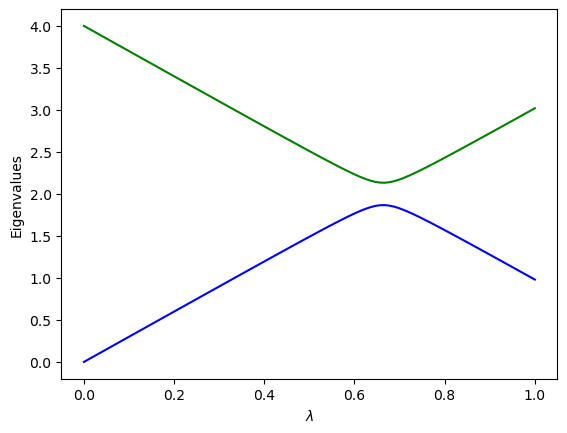

In [1]:
%matplotlib inline

%matplotlib inline

from  matplotlib import pyplot as plt
import numpy as np
dim = 2
#Setting up a tridiagonal matrix and finding eigenvectors and eigenvalues
Hamiltonian = np.zeros((dim,dim))
#number of lambda values
n = 100
lmbd = np.linspace(0.,1.0,n)
e0 = 0.0
e1 = 4.0
X = 0.20
Xp = 3.0
Eigenvalue = np.zeros((dim,n))
for i in range(n): 
    Hamiltonian[0,0] = lmbd[i]*Xp+e0
    Hamiltonian[0,1] = lmbd[i]*X
    Hamiltonian[1,0] = Hamiltonian[0,1]
    Hamiltonian[1,1] = e1+lmbd[i]*(-Xp)
    # diagonalize and obtain eigenvalues, not necessarily sorted
    EigValues, EigVectors = np.linalg.eig(Hamiltonian)
    # sort eigenvectors and eigenvalues
    permute = EigValues.argsort()
    EigValues = EigValues[permute]
    EigVectors = EigVectors[:,permute]
    Eigenvalue[0,i] = EigValues[0]
    Eigenvalue[1,i] = EigValues[1]
plt.plot(lmbd, Eigenvalue[0,:] ,'b-',lmbd, Eigenvalue[1,:],'g-',)
plt.xlabel('$\lambda$')
plt.ylabel('Eigenvalues')
plt.show()

This simple model exhibits a simple level crossing where the
composition of the final interacting states change character as we
gradually switch on the interaction.  In order to study how
entanglement relates to level crossing and the main results of our
investigations, we extend the simple two-level system to a four level
system. This system can be thought of as composed of two subsystems
$A$ and $B$. Each subsystem has computational basis states

$$
\vert 0\rangle_{\mathrm{A,B}}=\begin{bmatrix} 1 & 0\end{bmatrix}^T \hspace{1cm} \vert 1\rangle_{\mathrm{A,B}}=\begin{bmatrix} 0 & 1\end{bmatrix}^T.
$$

The subsystems could represent single particles or composite many-particle systems of a given symmetry.
This leads to the many-body computational basis states

$$
\vert 00\rangle = \vert 0\rangle_{\mathrm{A}}\otimes \vert 0\rangle_{\mathrm{B}}=\begin{bmatrix} 1 & 0 & 0 &0\end{bmatrix}^T,
$$

and

$$
\vert 10\rangle = \vert 1\rangle_{\mathrm{A}}\otimes \vert 0\rangle_{\mathrm{B}}=\begin{bmatrix} 0 & 1 & 0 &0\end{bmatrix}^T,
$$

and

$$
\vert 01\rangle = \vert 0\rangle_{\mathrm{A}}\otimes \vert 1\rangle_{\mathrm{B}}=\begin{bmatrix} 0 & 0 & 1 &0\end{bmatrix}^T,
$$

and finally

$$
\vert 11\rangle = \vert 1\rangle_{\mathrm{A}}\otimes \vert 1\rangle_{\mathrm{B}}=\begin{bmatrix} 0 & 0 & 0 &1\end{bmatrix}^T.
$$

These computational basis states define also the eigenstates of the non-interacting  Hamiltonian

$$
H_0\vert 00 \rangle = \epsilon_{00}\vert 00 \rangle,
$$

$$
H_0\vert 10 \rangle = \epsilon_{10}\vert 10 \rangle,
$$

$$
H_0\vert 01 \rangle = \epsilon_{01}\vert 01 \rangle,
$$

and

$$
H_0\vert 11 \rangle = \epsilon_{11}\vert 11 \rangle.
$$

The interacting part of the Hamiltonian $H_{\mathrm{I}}$ is given by the tensor product of two $\sigma_x$ and $\sigma_z$  matrices, respectively, that is

$$
H_{\mathrm{I}}=H_x\sigma_x\otimes\sigma_x+H_z\sigma_z\otimes\sigma_z,
$$

where $H_x$ and $H_z$ are interaction strength parameters. Our final Hamiltonian matrix is given by

$$
\boldsymbol{H}=\begin{bmatrix} \epsilon_{00}+H_z & 0 & 0 & H_x \\
                       0  & \epsilon_{10}-H_z & H_x & 0 \\
		       0 & H_x & \epsilon_{01}+H_z & 0 \\
		       H_x & 0 & 0 & \epsilon_{11} -H_z \end{bmatrix}.
$$

The four eigenstates of the above Hamiltonian matrix can in turn be used to
define density matrices. As an example, the density matrix of the
first eigenstate (lowest energy $E_0$) $\Psi_0$ is

$$
\rho_0=\left(\alpha_{00}\vert 00 \rangle\langle 00\vert+\alpha_{10}\vert 10 \rangle\langle 10\vert+\alpha_{01}\vert 01 \rangle\langle 01\vert+\alpha_{11}\vert 11 \rangle\langle 11\vert\right),
$$

where the coefficients $\alpha_{ij}$ are the eigenvector coefficients
resulting from the solution of the above eigenvalue problem.  We can
then in turn define the density matrix for the subsets $A$ or $B$ as

$$
\rho_A=\mathrm{Tr}_B(\rho_{0})=\langle 0 \vert \rho_{0} \vert 0\rangle_{B}+\langle 1 \vert \rho_{0} \vert 1\rangle_{B},
$$

or

$$
\rho_B=\mathrm{Tr}_A(\rho_{\Psi_0})=\langle 0 \vert \rho_{0} \vert 0\rangle_{A}+\langle 1 \vert \rho_{0} \vert 1\rangle_{A}.
$$

The density matrices for these subsets can be used to compute the
so-called von Neumann entropy, which is one of the possible measures
of entanglement. A pure state has entropy equal zero while entangled
state have an entropy larger than zero. The von-Neumann entropy is
defined as

$$
S(A,B)=-\mathrm{Tr}\left(\rho_{A,B}\log_2 (\rho_{A,B})\right).
$$

The example here shows the above von Neumann entropy based on the
density matrix for the lowest many-body state. We see clearly a jump
in the entropy around the point where we have a level crossing. At
interaction strenght $\lambda=0$ we have many-body states purely
defined by their computational basis states. As we switch on the
interaction strength, we obtain an increased degree of mixing and the
entropy increases till we reach the level crossing point where we see
an additional and sudden increase in entropy. Similar behaviors are
observed for the other states. The most important result from this
example is that entanglement is driven by the Hamiltonian itself and
the strength of the interaction matrix elements and the
non-interacting energies.

/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/scipy/linalg/_matfuncs_inv_ssq.py:827: LogmExactlySingularWarning: The logm input matrix is exactly singular.
  warnings.warn(exact_singularity_msg, LogmExactlySingularWarning)


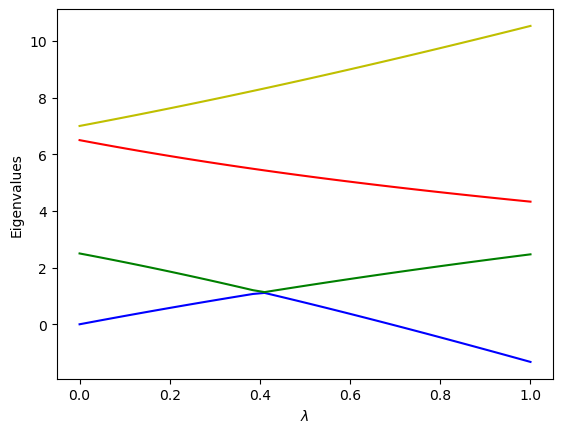

<function matplotlib.pyplot.show(close=None, block=None)>

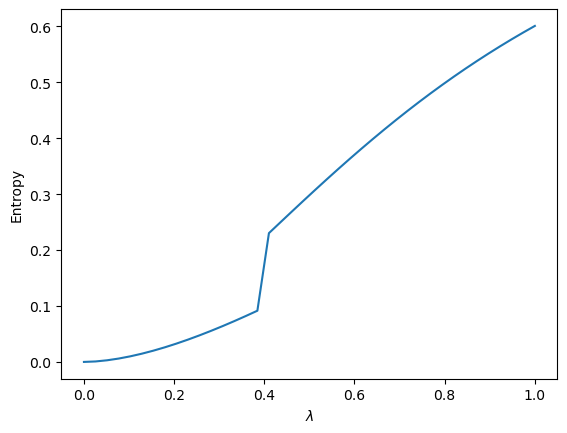

In [2]:
%matplotlib inline
from  matplotlib import pyplot as plt
import numpy as np
from scipy.linalg import logm, expm
def log2M(a): # base 2 matrix logarithm
    return logm(a)/np.log(2.0)

dim = 4
Hamiltonian = np.zeros((dim,dim))
#number of lambda values
n = 40
lmbd = np.linspace(0.0,1.0,n)
Hx = 2.0
Hz = 3.0
# Non-diagonal part as sigma_x tensor product with sigma_x
sx = np.matrix([[0,1],[1,0]])
sx2 = Hx*np.kron(sx, sx)
# Diagonal part as sigma_z tensor product with sigma_z
sz = np.matrix([[1,0],[0,-1]])
sz2 = Hz*np.kron(sz, sz)
noninteracting = [0.0, 2.5, 6.5, 7.0]
D = np.diag(noninteracting)
Eigenvalue = np.zeros((dim,n))
Entropy = np.zeros(n)

for i in range(n): 
    Hamiltonian = lmbd[i]*(sx2+sz2)+D
    # diagonalize and obtain eigenvalues, not necessarily sorted
    EigValues, EigVectors = np.linalg.eig(Hamiltonian)
    # sort eigenvectors and eigenvalues
    permute = EigValues.argsort()
    EigValues = EigValues[permute]
    EigVectors = EigVectors[:,permute]
    # Compute density matrix for selected system state, here ground state
    DensityMatrix = np.zeros((dim,dim))
    DensityMatrix = np.outer(EigVectors[:,0],EigVectors[:,0])
    # Project down on substates and find density matrix for subsystem
    d = np.matrix([[1,0],[0,1]])
    v1 = [1.0,0.0]
    proj1 = np.kron(v1,d)
    x1 = proj1 @ DensityMatrix @ proj1.T
    v2 = [0.0,1.0]
    proj2 = np.kron(v2,d)
    x2 = proj2 @ DensityMatrix @ proj2.T
    # Total density matrix for subsystem
    total = x1+x2
    # von Neumann Entropy for subsystem 
    Entropy[i] = -np.matrix.trace(total @ log2M(total))
    # Plotting eigenvalues and entropy as functions of interaction strengths
    Eigenvalue[0,i] = EigValues[0]
    Eigenvalue[1,i] = EigValues[1]
    Eigenvalue[2,i] = EigValues[2]
    Eigenvalue[3,i] = EigValues[3]
plt.plot(lmbd, Eigenvalue[0,:] ,'b-',lmbd, Eigenvalue[1,:],'g-',)
plt.plot(lmbd, Eigenvalue[2,:] ,'r-',lmbd, Eigenvalue[3,:],'y-',)
plt.xlabel('$\lambda$')
plt.ylabel('Eigenvalues')
plt.show()
plt.plot(lmbd, Entropy)
plt.xlabel('$\lambda$')
plt.ylabel('Entropy')          
plt.show

With these introductory examples, we are now in the position where we
can start to interpret and model realistic interacting many-electron
systems in terms of the strength of the Coulomb interaction and the
shapes of the potential well. Our specific system is composed of two
potential wells with one fermion (electrons in our case) trapped in
each well.  Each potential well can sustain a certain number of bound
single-particle states and defines our subsystems $A$ and $B$. The
non-interacting part of the Hamiltonian is given by the mere addition
of the single-particle energies from each repsective well (make figure
with labels A and B and single-particle energies).

The eigenstates of the non-interacting Hamiltonian $H_0$ are given by
various computational basis states with the difference from the above
simple models that now we have more than two states in each
subsystem. The depths of the potential wells and their respective
distances can be tuned in an experimental set up. The theoretical
calculations presented here can thus serve as a tool which aids in
finding the optimal parameters in order to study entanglement in a
many-body environment.

What follows is a description of the theoretical models used to
simulate the two-electron system. More text to come.